# import libraries

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')

In [10]:
# Set plot style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(10,6)

# Random seed for reproducibility
np.random.seed(42)

# Generate datasets

# classification dataset, predict customer churn (0, 1)
classification_data={
    'customer_id': range(1000),
    'age': np.random.randint(18, 80, 1000),
    'monthly_spend': np.random.uniform(20, 200, 1000),
    'tenure_months': np.random.randint(1, 60, 1000),
    'support_calls':np.random.randint(0, 10, 1000),
    'plan_type': np.random.choice(['Basic', 'Premium', 'Standard'], 1000),
    'churn': np.random.choice([0,1], 1000, p=[0.7, 0.3])
}
df_class = pd.DataFrame(classification_data)


In [11]:
df_class.head()

,customer_id,age,monthly_spend,tenure_months,support_calls,plan_type,churn
0,0,56,87.813015,51,6,Standard,0
1,1,69,154.924094,15,4,Basic,0
2,2,46,90.738101,4,3,Standard,0
3,3,32,169.249560,21,9,Premium,0
4,4,60,122.434664,13,3,Standard,0


In [14]:
# Introducing some missing values
df_class.loc[np.random.choice(df_class.index, 50), 'monthly_spend'] = np.nan

# Saving dataset
df_class.to_csv('classification_data.csv', index=False)


Created synthetic datasets to simulate real-world scenarios 

customer churn,  dataset includes numerical, categorical, and target variables.)

1000 rows, features like age, monthly spend, tenure, plan type, and churn (binary).

Missing Values: 
Introduced 50 missing values in numerical columns to demonstrate handling techniques.

# Data Inspection

In [15]:
# Data Inspection

# function to inspect dataset
def inspect_data(df, name):
    print(f"\n==={name} Dataset ===")
    print("\nHead:\n", df.head())
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\Info:", df.info())
    print("\nDescribe:", df.describe())
    print("\nMissing Values:", df.isnull().sum())
    print("\nUnique Values:", df.nunique())

inspect_data(df_class, "Classification")


===Classification Dataset ===

Head:
    customer_id  age  monthly_spend  tenure_months  support_calls plan_type  \
0            0   56      87.813015             51              6  Standard   
1            1   69     154.924094             15              4     Basic   
2            2   46      90.738101              4              3  Standard   
3            3   32     169.249560             21              9   Premium   
4            4   60     122.434664             13              3  Standard   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0  

Shape: (1000, 7)

Columns: ['customer_id', 'age', 'monthly_spend', 'tenure_months', 'support_calls', 'plan_type', 'churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    1000 non-null   int64  
 1   age            1000 non-null   int32  
 2   monthly_spend  9

# Split data to prevent leakage, then handle missing values and outliers.

In [16]:
# Train-Test Split

# To prevent data leakage, split before any transformations

X_class = df_class.drop(['customer_id', 'churn'], axis=1)
y_class = df_class['churn']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [19]:
 # Missing Value Handling

# Impute monthly_spend with mediam
median_spend = X_train_class['monthly_spend'].median()
X_train_class['monthly_spend'].fillna(median_spend, inplace=True)
X_test_class['monthly_spend'].fillna(median_spend, inplace=True)


# Verify no missing values
print("Missing Values After Imputation:\n")
print("Classification Train:\n", X_train_class.isnull().sum())

Missing Values After Imputation:

Classification Train:
 age              0
monthly_spend    0
tenure_months    0
support_calls    0
plan_type        0
dtype: int64


In [20]:
#  Data Type Conversion  
# Classification: Convert plan_type to category
X_train_class['plan_type'] = X_train_class['plan_type'].astype('category')
X_test_class['plan_type'] = X_test_class['plan_type'].astype('category')

# Verify data types
print("\nClassification Train Dtypes:")
print(X_train_class.dtypes)


Classification Train Dtypes:
age                 int32
monthly_spend     float64
tenure_months       int32
support_calls       int32
plan_type        category
dtype: object


# Univariate Analysis and Visualization

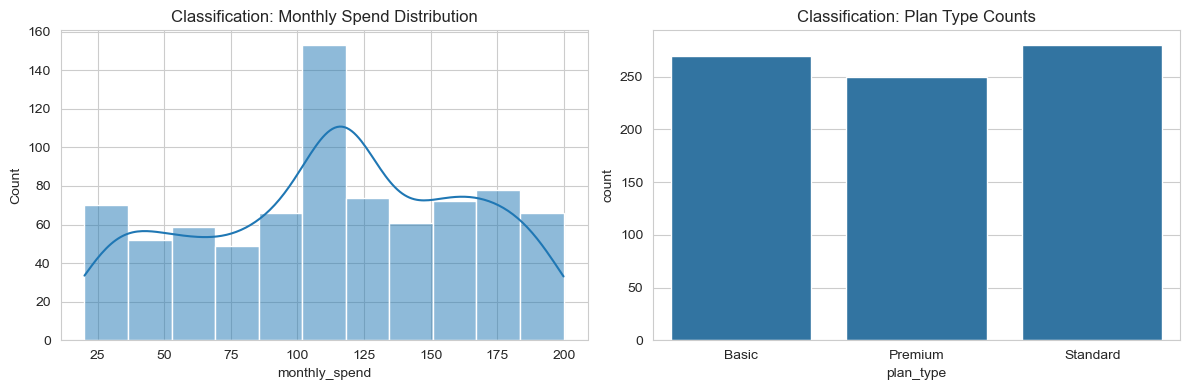

In [21]:
# Classification: Numerical and Categorical
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_train_class['monthly_spend'], kde=True)
plt.title('Classification: Monthly Spend Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='plan_type', data=X_train_class)
plt.title('Classification: Plan Type Counts')
plt.tight_layout()
plt.show()


# Bivariate and Multivariate Analysis and Visualization

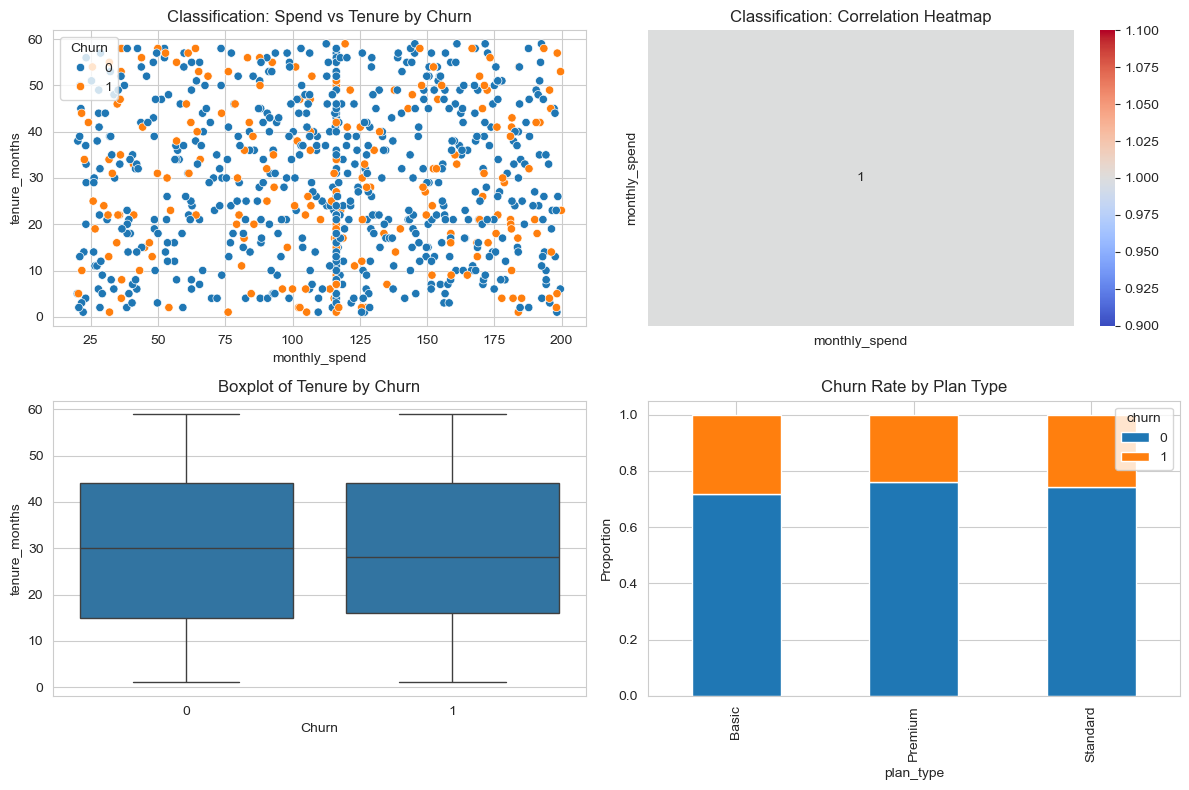

In [25]:
# Combine X and y for plotting
X_train_plot = X_train_class.copy()
X_train_plot['Churn'] = y_train_class

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='monthly_spend', y='tenure_months', hue='Churn', data=X_train_plot)
plt.title('Classification: Spend vs Tenure by Churn')

plt.subplot(2, 2, 2)
sns.heatmap(X_train_class.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Classification: Correlation Heatmap')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='tenure_months', data=X_train_plot)
plt.title('Boxplot of Tenure by Churn')

ax4 = plt.subplot(2, 2, 4)
pd.crosstab(df_class['plan_type'], df_class['churn'], normalize='index') \
    .plot(kind='bar', stacked=True, ax=ax4)
plt.title('Churn Rate by Plan Type')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


# Outlier Detection

In [26]:
Q1 = X_train_class['monthly_spend'].quantile(0.25)
Q3 = X_train_class['monthly_spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_class = X_train_class[(X_train_class['monthly_spend'] < lower_bound) | (X_train_class['monthly_spend'] > upper_bound)]
print(f"Classification: {len(outliers_class)} outliers in monthly_spend")

Classification: 0 outliers in monthly_spend



Classification: Plan Type vs Churn
churn        0   1
plan_type         
Basic      194  76
Premium    187  63
Standard   210  70


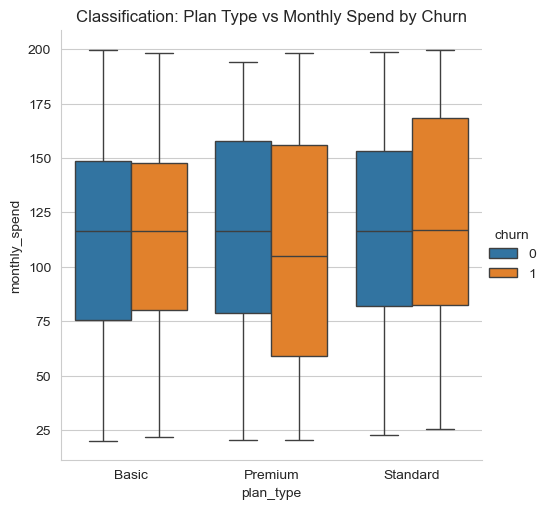

In [27]:
# Categorical Variable Analysis and Encoding
# Classification: Analyze plan_type
print("\nClassification: Plan Type vs Churn")
print(pd.crosstab(X_train_class['plan_type'], y_train_class))
sns.catplot(x='plan_type', y='monthly_spend', hue=y_train_class, kind='box', data=X_train_class)
plt.title('Classification: Plan Type vs Monthly Spend by Churn')
plt.show()

In [28]:
# Encode plan_type (One-Hot Encoding)
X_train_class = pd.get_dummies(X_train_class, columns=['plan_type'], prefix='plan')
X_test_class = pd.get_dummies(X_test_class, columns=['plan_type'], prefix='plan')

 # Feature Engineering

In [29]:
# Classification: Create new features
X_train_class['spend_per_month'] = X_train_class['monthly_spend'] / X_train_class['tenure_months']
X_test_class['spend_per_month'] = X_test_class['monthly_spend'] / X_test_class['tenure_months']
X_train_class['high_support'] = (X_train_class['support_calls'] > 5).astype(int)
X_test_class['high_support'] = (X_test_class['support_calls'] > 5).astype(int)


In [30]:
# Numerical transformation (log)
X_train_class['log_monthly_spend'] = np.log1p(X_train_class['monthly_spend'])
X_test_class['log_monthly_spend'] = np.log1p(X_test_class['monthly_spend'])


# Aggregation and Pivot Tables

In [31]:
# Classification: Group by plan type
print("\nClassification: Grouped Stats")
print(X_train_class.groupby(['plan_Basic', 'plan_Premium', 'plan_Standard'])['monthly_spend'].agg(['mean', 'count']))


Classification: Grouped Stats
                                             mean  count
plan_Basic plan_Premium plan_Standard                   
False      False        True           116.137683    280
           True         False          113.009243    250
True       False        False          111.568419    270


In [32]:
# Verify final datasets
print("\nFinal Classification Train Shape:", X_train_class.shape)
print(X_train_class.head())


Final Classification Train Shape: (800, 10)
     age  monthly_spend  tenure_months  support_calls  plan_Basic  \
270   75     130.691047             22              5        True   
112   79     171.999321             28              1       False   
990   22     118.894563             12              9        True   
665   69     161.985257             37              0       False   
404   35      52.779285             14              1       False   

     plan_Premium  plan_Standard  spend_per_month  high_support  \
270         False          False         5.940502             0   
112          True          False         6.142833             0   
990         False          False         9.907880             1   
665         False           True         4.377980             0   
404          True          False         3.769949             0   

     log_monthly_spend  
270           4.880459  
112           5.153288  
990           4.786613  
665           5.093660  
404         

In [33]:
print("# will continue later")

# will continue later
